In [1]:
"""
Name: fd_MC.ipynb
Authors: Stephan Meighen-Berger, Martina Karl
Example for the MC method runs
"""

'\nName: fd_MC.ipynb\nAuthors: Stephan Meighen-Berger, Martina Karl\nExample for the MC method runs\n'

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import tqdm

In [3]:
# Latex text rendering
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [4]:
# Adding path to module
sys.path.append("../core/")

In [5]:
# Module imports
from fourth_day import FD
from fd_config import config

In [6]:
# Creating a fourth_day object
fd = FD(org_filter='generous')

In [7]:
# Launching solver
seconds = 100
pop = 100
results, results_enc, results_shear = fd.solve(pop, 5., [0.], 1., seconds=seconds, regen=1e-4)

../core\fd_roll_dice.py:321: RuntimeWarning: invalid value encountered in double_scalars
  (np.linalg.norm(new_vec) * np.linalg.norm(current_vec))


In [8]:
# Plotting standards
std_size = 10.
fontsize = 20.
lw=3.
h_length=1.5

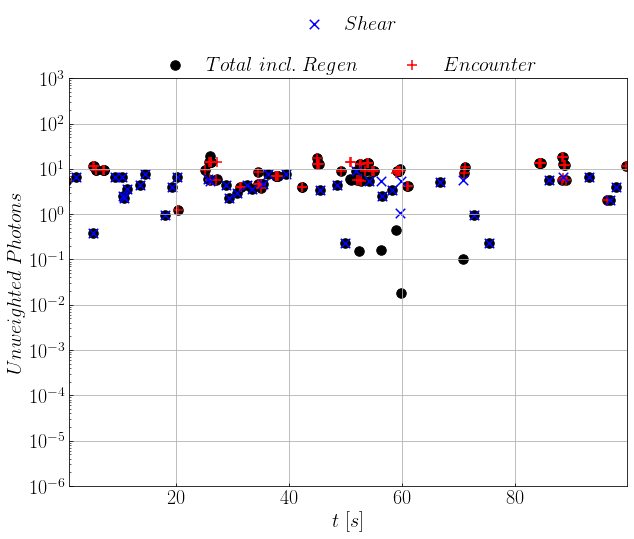

In [9]:
# Energy distributions
figure, ax = plt.subplots(figsize=(std_size, std_size * 6. / 8.))
ax.scatter(fd.t, results[0], s=lw*30, color='k', label=r'$Total$ $incl.$ $Regen$')
ax.scatter(fd.t, results_enc[0], s=lw*30, color='r', label=r'$Encounter$', marker="+")
ax.scatter(fd.t, results_shear[0], s=lw*30, color='b', label=r'$Shear$', marker="x")
ax.set_xlim(1e0, max(fd.t))
ax.set_ylim(1e-6, 1e3)
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_xlabel(r'$t\;[s]$', fontsize=fontsize)
ax.set_ylabel(r'$Unweighted\;Photons$', fontsize=fontsize)
ax.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
plt.grid(True)
h, l = ax.get_legend_handles_labels()
lgd1 = ax.legend(h[:2],l[:2], loc=9, bbox_to_anchor=(0.5, +1.1),
                 ncol=2, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
lgd2 = ax.legend(h[2:],l[2:], loc=9, bbox_to_anchor=(0.5, +1.2),
                 ncol=2, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax.add_artist(lgd1)
plt.show()

In [10]:
# figure.savefig("C:\\Users\\steph\\Desktop\\MC_Example.png",
#                bbox_inches='tight')

(-55.0, 55.0)

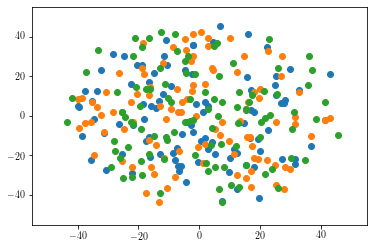

In [11]:
figure = plt.figure()
ax = figure.add_subplot(111)
im, = ax.plot(fd.mc_run.distribution[0][:,0], fd.mc_run.distribution[0][:,1],
              linestyle='', marker='o')
im, = ax.plot(fd.mc_run.distribution[0][:,0], fd.mc_run.distribution[0][:,2],
              linestyle='', marker='o')
im, = ax.plot(fd.mc_run.distribution[0][:,1], fd.mc_run.distribution[0][:,2],
              linestyle='', marker='o')
ax.set_xlim(-fd.world.bounding_box/2, fd.world.bounding_box/2)
ax.set_ylim(-fd.world.bounding_box/2, fd.world.bounding_box/2)

(-55.0, 55.0)

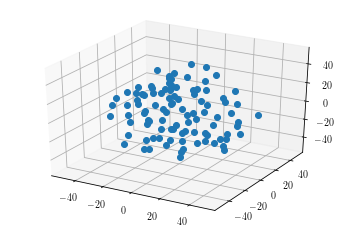

In [12]:
from mpl_toolkits.mplot3d import Axes3D
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')
im, = ax.plot(fd.mc_run.distribution[0][:,0],
              fd.mc_run.distribution[0][:,1],
              fd.mc_run.distribution[0][:,2],
              linestyle='', marker='o')
ax.set_xlim(-fd.world.bounding_box/2, fd.world.bounding_box/2)
ax.set_ylim(-fd.world.bounding_box/2, fd.world.bounding_box/2)
ax.set_zlim(-fd.world.bounding_box/2, fd.world.bounding_box/2)

In [13]:
"""
# Animation stack
# This requires "save population" in config to be set to true
fontsize = 15.
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
# The frames are created in a loop
cmap = plt.cm.inferno
norm = colors.Normalize(vmin=0., vmax=1.)
for i, _ in tqdm(enumerate(fd.t)):
    figure = plt.figure(figsize=(std_size, std_size * 6. / 8.))
    ax = figure.add_subplot(111, projection='3d')
    ax.scatter(fd.mc_run.distribution[i][:,0], fd.mc_run.distribution[i][:,1], fd.mc_run.distribution[i][:,2],
               color=cmap(norm(fd.mc_run.distribution[i][:,-1] / fd.mc_run.distribution[i][:,-2])),
               s=50.
               )
    ax.title=ax.set_title('Population t = %.f s' %fd.t[i], fontsize=fontsize)
    ax.set_xlim(-fd.world.bounding_box/2, fd.world.bounding_box/2)
    ax.set_ylim(-fd.world.bounding_box/2, fd.world.bounding_box/2)
    ax.set_zlim(-fd.world.bounding_box/2, fd.world.bounding_box/2)
    ax.set_xlabel(r'$X\;[\mathrm{mm}]$', fontsize=fontsize)
    ax.set_ylabel(r'$Y\;[\mathrm{mm}]$', fontsize=fontsize)
    ax.set_zlabel(r'$Z\;[\mathrm{mm}]$', fontsize=fontsize)
    ax.tick_params(axis = 'both', which = 'major', labelsize=fontsize)
    ax.tick_params(axis = 'both', which = 'minor', labelsize=fontsize)
    figure.savefig('C:\\Users\\steph\\OneDrive\\University TUM\\PhD\\Plots\\Biolumi\\Frames\\frame_%d.png' %i)
    plt.close(figure)
import imageio
images = []
filenames = np.array([
    'C:\\Users\\steph\\OneDrive\\University TUM\\PhD\\Plots\\Biolumi\\Frames\\frame_%d.png' %i
    for i in range(len(fd.t))
])
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('C:\\Users\\steph\\OneDrive\\University TUM\\PhD\\Plots\\Biolumi\\sphere.gif',
                images, duration=0.1)
"""

'\n# Animation stack\n# This requires "save population" in config to be set to true\nfontsize = 15.\nimport matplotlib.colors as colors\nfrom mpl_toolkits.mplot3d import Axes3D\n# The frames are created in a loop\ncmap = plt.cm.inferno\nnorm = colors.Normalize(vmin=0., vmax=1.)\nfor i, _ in tqdm(enumerate(fd.t)):\n    figure = plt.figure(figsize=(std_size, std_size * 6. / 8.))\n    ax = figure.add_subplot(111, projection=\'3d\')\n    ax.scatter(fd.mc_run.distribution[i][:,0], fd.mc_run.distribution[i][:,1], fd.mc_run.distribution[i][:,2],\n               color=cmap(norm(fd.mc_run.distribution[i][:,-1] / fd.mc_run.distribution[i][:,-2])),\n               s=50.\n               )\n    ax.title=ax.set_title(\'Population t = %.f s\' %fd.t[i], fontsize=fontsize)\n    ax.set_xlim(-fd.world.bounding_box/2, fd.world.bounding_box/2)\n    ax.set_ylim(-fd.world.bounding_box/2, fd.world.bounding_box/2)\n    ax.set_zlim(-fd.world.bounding_box/2, fd.world.bounding_box/2)\n    ax.set_xlabel(r\'$X\\;[\